In [22]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from dateutil import parser
import io
import base64
from IPython.display import HTML
from imblearn.under_sampling import RandomUnderSampler

In [1]:
fname_numeric = "./train_numeric.csv"
fname_date    = "./train_date.csv"
fname_cat     = "./train_categorical.csv"

import dask.dataframe as dd
dd_num = dd.read_csv(fname_numeric)
dd_dat = dd.read_csv(fname_date)
dd_cat = dd.read_csv(fname_cat)

dd_num.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
# 全部 NaN な列をdropして、Nanを大きな値で置換。
dd_num =  dd_num.fillna(999)
print("after" + str(dd_num.describe()))

afterDask DataFrame Structure:
                  Id L0_S0_F0 L0_S0_F2 L0_S0_F4 L0_S0_F6 L0_S0_F8 L0_S0_F10 L0_S0_F12 L0_S0_F14 L0_S0_F16 L0_S0_F18 L0_S0_F20 L0_S0_F22 L0_S1_F24 L0_S1_F28 L0_S2_F32 L0_S2_F36 L0_S2_F40 L0_S2_F44 L0_S2_F48 L0_S2_F52 L0_S2_F56 L0_S2_F60 L0_S2_F64 L0_S3_F68 L0_S3_F72 L0_S3_F76 L0_S3_F80 L0_S3_F84 L0_S3_F88 L0_S3_F92 L0_S3_F96 L0_S3_F100 L0_S4_F104 L0_S4_F109 L0_S5_F114 L0_S5_F116 L0_S6_F118 L0_S6_F122 L0_S6_F132 L0_S7_F136 L0_S7_F138 L0_S7_F142 L0_S8_F144 L0_S8_F146 L0_S8_F149 L0_S9_F155 L0_S9_F160 L0_S9_F165 L0_S9_F170 L0_S9_F175 L0_S9_F180 L0_S9_F185 L0_S9_F190 L0_S9_F195 L0_S9_F200 L0_S9_F205 L0_S9_F210 L0_S10_F219 L0_S10_F224 L0_S10_F229 L0_S10_F234 L0_S10_F239 L0_S10_F244 L0_S10_F249 L0_S10_F254 L0_S10_F259 L0_S10_F264 L0_S10_F269 L0_S10_F274 L0_S11_F282 L0_S11_F286 L0_S11_F290 L0_S11_F294 L0_S11_F298 L0_S11_F302 L0_S11_F306 L0_S11_F310 L0_S11_F314 L0_S11_F318 L0_S11_F322 L0_S11_F326 L0_S12_F330 L0_S12_F332 L0_S12_F334 L0_S12_F336 L0_S12_F338 L0_S12_F3

In [58]:
chunk_num = pd.read_csv(fname_numeric, chunksize = 100)
chunk_dat = pd.read_csv(fname_date   , chunksize = 100)
chunk_cat = pd.read_csv(fname_cat    , chunksize = 100)




sample_num = 100000
df_num = chunk_num.get_chunk(sample_num)
df_dat = chunk_dat.get_chunk(sample_num)
df_cat = chunk_cat.get_chunk(sample_num)

C:\Users\Tomonobu\Anaconda3\lib\site-packages\ipykernel\zmqshell.py:533: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,337,340,342,344,346,348,351,354,357,360,363,366,369,372,375,378,381,384,387,390,393,396,399,402,

In [59]:
df_num.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [60]:
df_cat.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# 全部 NaN な列をdropして、Nanを大きな値で置換。
print("before" + str(df_num.shape))
df_num.dropna(how='all', axis=1, inplace=True)
df_num.fillna(999, inplace=True)
print("after" + str(df_num.shape))

before(100000, 970)
after(100000, 970)


In [62]:
# 全部 NaN な列をdropして、Nanを大きな値で置換。
print("before" + str(df_cat.shape))
df_cat.dropna(how='all', axis=1, inplace=True)
df_cat.fillna(999, inplace=True)
print("after" + str(df_cat.shape))

before(100000, 2141)
after(100000, 1128)


In [63]:
# カテゴリ変数のパース(仮実装で、値に変換するだけ)
# 最終的にはビットマップっぽいので、エンコーディングする。
from parse import *
def cat_data_to_val(x):
    if type(x) is str:
        r = parse("T{}", x)
        return float(r[0])
    else:
        return x


In [64]:

def is_bit_on(s, pos):
    if type(s) is str:
        r = parse("T{}", s)
        val = (int(r[0]))
        mask = 1 << pos
        if val & mask:
            return 1
        else:
            return 0
    else:
        return 0

In [65]:
def decode_categorical_data(df):
    for column_name, item in df.iteritems():
        if column_name != 'Id':
            vallist = item.unique()
            bitlist = []
            for c in vallist:
                if type(c) is str:
                    r = parse("T{}", c)
                    val = int(r[0])
                    if val < 0:
                        val = val + 4294967296
                    bitpos = int(np.log2(val))
                    bitlist.append(bitpos)

            for bit in bitlist:
                df[column_name + "_bit_" + str(bit)] = df[column_name].apply(lambda x:is_bit_on(x, bit))
            df.drop(column_name, axis=1, inplace=True)

    

In [66]:
decode_categorical_data(df_cat)

In [67]:
df_cat.columns

Index(['Id', 'L0_S1_F25_bit_0', 'L0_S1_F27_bit_3', 'L0_S1_F29_bit_0',
       'L0_S1_F31_bit_3', 'L0_S2_F33_bit_0', 'L0_S2_F35_bit_5',
       'L0_S2_F35_bit_6', 'L0_S2_F37_bit_0', 'L0_S2_F39_bit_5',
       ...
       'L3_S49_F4230_bit_4', 'L3_S49_F4230_bit_2', 'L3_S49_F4232_bit_0',
       'L3_S49_F4234_bit_0', 'L3_S49_F4235_bit_4', 'L3_S49_F4235_bit_2',
       'L3_S49_F4237_bit_0', 'L3_S49_F4239_bit_0', 'L3_S49_F4240_bit_4',
       'L3_S49_F4240_bit_2'],
      dtype='object', length=1581)

In [68]:
df =  pd.merge(df_cat, df_num, on=['Id'], how = 'left')

In [69]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Id, L0_S1_F25_bit_0, L0_S1_F27_bit_3, L0_S1_F29_bit_0, L0_S1_F31_bit_3, L0_S2_F33_bit_0, L0_S2_F35_bit_5, L0_S2_F35_bit_6, L0_S2_F37_bit_0, L0_S2_F39_bit_5, L0_S2_F39_bit_6, L0_S2_F41_bit_0, L0_S2_F43_bit_5, L0_S2_F43_bit_6, L0_S2_F45_bit_0, L0_S2_F47_bit_5, L0_S2_F47_bit_6, L0_S2_F49_bit_0, L0_S2_F51_bit_5, L0_S2_F51_bit_6, L0_S2_F53_bit_0, L0_S2_F55_bit_5, L0_S2_F55_bit_6, L0_S2_F57_bit_0, L0_S2_F59_bit_5, L0_S2_F59_bit_6, L0_S2_F61_bit_0, L0_S2_F63_bit_5, L0_S2_F63_bit_6, L0_S2_F65_bit_0, L0_S2_F67_bit_5, L0_S2_F67_bit_6, L0_S4_F105_bit_0, L0_S4_F107_bit_0, L0_S4_F108_bit_6, L0_S4_F110_bit_0, L0_S4_F112_bit_0, L0_S4_F113_bit_6, L0_S9_F151_bit_0, L0_S9_F153_bit_0, L0_S9_F154_bit_3, L0_S9_F154_bit_2, L0_S9_F154_bit_15, L0_S9_F154_bit_9, L0_S9_F154_bit_24, L0_S9_F154_bit_6, L0_S9_F154_bit_5, L0_S9_F154_bit_7, L0_S9_F156_bit_0, L0_S9_F158_bit_0, L0_S9_F159_bit_3, L0_S9_F159_bit_2, L0_S9_F159_bit_15, L0_S9_F159_bit_9, L0_S9_F159_bit_24, L0_S9_F159_bit_5, L0_S9_F

In [70]:
import xgboost as xgb


def separate_X_y(df):
    X = df.drop(['Response'], axis=1)
    y = df['Response']
    return np.array(X), np.array(y)

 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def train_with_r_forest(df):
    X_train, y_train = separate_X_y(df)

    cl_weight = {0:0.3, 1:0.7}
    
    rf = RandomForestClassifier(max_depth=5,n_estimators=10,class_weight = cl_weight)
    rf.fit(X_train, y_train)
    return rf





In [210]:
import numpy as np
from sklearn.base import clone
from joblib import Parallel, delayed

class ClassImbalanceRedux:
    def __init__(self, clf, n_bags = 30):
        self.clf = clf
        self.n_bags = n_bags
    def fit(self, X, y, n_jobs = -1, seed = 93):
        # Fix seed for reproducibility of results
        np.random.seed(seed)
        # Check which class is imbalance
        counts = [np.sum(y == 0), np.sum(y == 1)]
        self.under = np.argmin(counts)
        self.under_count = counts[self.under]
#        self.fit_clfs = Parallel(n_jobs = n_jobs, verbose = 11)(delayed(self._fitBag)(X, y) for i in range(self.n_bags))
        self.fit_clfs = (self._fitBag(X, y) for i in range(self.n_bags))

    def _fitBag(self, X, y):
        # Clean clf parameters
        clf = clone(self.clf)
        # Generate bootstrapped sample
        y_under_indexes = (y == self.under)
        y_under = y[y_under_indexes]
        y_over_indexes = np.random.choice(np.where(y != self.under)[0], self.under_count)
        y_over = y[y_over_indexes]
        X_bag = np.concatenate((X[y_under_indexes], X[y_over_indexes]), axis = 0)
        y_bag = np.concatenate((y_under, y_over), axis = 0)
        # Fit model in bag
        clf.fit(X_bag, y_bag)
        return clf

    def _predBag(self, clf, X_test):
        # Predict clf class
        self.pred_bag += 1
        # print("Predicting for model in bag {}/{}".format(self.pred_bag, self.n_bags))
        return clf.predict(X_test)

    def predict(self, X_test, threshold = 0.5):
        self.pred_bag = 0
        self.y_hat = np.squeeze([self._predBag(clf, X_test) for clf in self.fit_clfs])
        prob = np.sum(self.y_hat, axis = 0)/self.y_hat.shape[0]
        return prob > threshold

    def predict_proba(self, X_test):
        self.pred_bag = 0
        self.y_hat = np.squeeze([self._predBag(clf, X_test) for clf in self.fit_clfs])
        prob = np.sum(self.y_hat, axis = 0)/self.y_hat.shape[0]
        return prob

    def save(self, path = '.'):
        np.save(path, arr = self)

In [222]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

def train_with_redux(df_train, weight, bag_num):
    X_train, y_train = separate_X_y(df_train)
    
    counts = [np.sum(y_train == 0), np.sum(y_train == 1)]
    under = np.min(counts)
    over  = np.max(counts)
#    bag_num = int(over / under)
    bag_num = bag_num

    cl_weight = {0:weight, 1:0.5}

    clf = RandomForestClassifier(max_depth=5,n_estimators=10,class_weight = cl_weight)
    cir = ClassImbalanceRedux(clf, n_bags = bag_num)
    cir.fit(X_train, y_train) # y_train needs to be binary. np.int format only.
    return cir
    
    # cir.save('/home/user/model.npy')
    ## To load for production
    # cir = np.load('/home/user/model.npy').item()
    
    

In [223]:
def calc_mcc(cf_mat):
    tn, fp, fn, tp = cf_mat.ravel()
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return mcc


    

12
0.0750049549248
0.134615828141
0.0849588603119
0.0921152960907
0.127388631451
0.135788796142
0.12283632136
0.148168073477
0.172980440341
0.178691317482
0.142346183824
0.132995967008
0.164607916713
0.14119324603
0.150614201638
0.172600506536
0.173007613717
0.165817261031
0.129815642276
0.17283819386
0.165682012569
0.149142259778
0.174419787334
0.17219743387
0.170510496496
0.137004448679
0.175483462132
0.169618137258
0.155387304213
0.167812703309
0.17280737675
0.159908009257
0.130314151637
0.177125592349
0.172288762615
0.151106521568
0.168412994358
0.173423378302
0.159309130143
0.123582972975


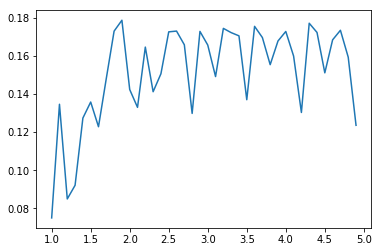

16
0.107441117281
0.165512205052
0.0802997229293
0.121817020072
0.118603754241
0.180568357524
0.163110016314
0.171031832203
0.207415088425
0.193524071311
0.197365004721
0.188638235632
0.184895463631
0.14749354042
0.164519312609
0.189138272266
0.15622525195
0.195189529112
0.212865804819
0.204893542911
0.19009358119
0.183777702655
0.162798005726
0.15775888444
0.171323753159
0.18981332859
0.144906520013
0.198130776978
0.206691810209
0.213069513421
0.198189726588
0.170885531209
0.150176376463
0.149998535869
0.139620979323
0.169748878597
0.145381928891
0.19390884969
0.212865804819
0.176587338428


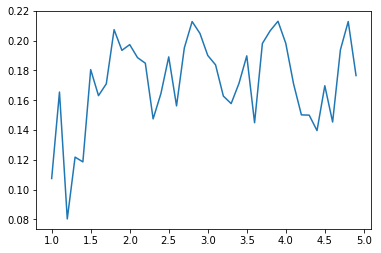

20
0.0894328145616
0.108849450727
0.152191624823
0.13769920898
0.109755085152
0.195926232507
0.183912975755
0.156964239208
0.189098554546
0.193963165614
0.176676798767
0.204094550898
0.208341599047
0.181840472382
0.199756898172
0.202195548085
0.18479505456
0.199082904735
0.197768041624
0.196166739085
0.205455351633
0.191994211773
0.203304397833
0.205455351633
0.192625083111
0.200896374415
0.199082904735
0.179648690487
0.203919114839
0.193329429556
0.180861644878
0.207719962402
0.200437338228
0.174280658534
0.201039317288
0.193329429556
0.173101927026
0.204873015701
0.193329429556
0.173688512236


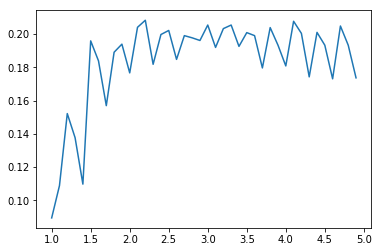

24
0.075504109398
0.123449864243
0.136780042683
0.142826402068
0.149692847166
0.178075803428
0.180425616347
0.191650985626
0.199413706622
0.210244757739
0.208512986045
0.217446348997
0.212830946516
0.214969331539
0.218596687289
0.219357800499
0.212597782194
0.220005560212
0.225661504681
0.208803351939
0.227055649482
0.197369547301
0.227761897744
0.205012121503
0.227055649482
0.204374608025
0.227761897744
0.21203785822
0.218528917332
0.205655261319
0.219238961608
0.193398635942
0.218528917332
0.206304111813
0.22460696906
0.199236462714
0.22460696906
0.205012121503
0.223889142765
0.198608662742


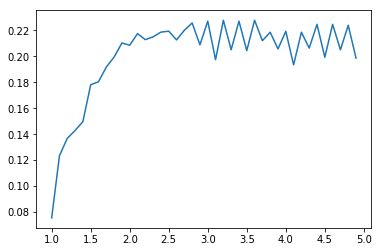

28
0.104248525675
0.0889859818245
0.102419131
0.114834088157
0.13921067007
0.182492267833
0.158748321027
0.146264413985
0.167054517951
0.171652889892
0.173365930905
0.177333883304
0.1796664811
0.212096188026
0.214854063378
0.17697138905
0.195580598224
0.198722799069
0.199039552068
0.205916396903
0.193322462164
0.200017159899
0.225498777034
0.198099695526
0.194358672174
0.195078482043
0.189386748216
0.198577258822
0.195129697947
0.195618187569
0.220764522545
0.201261169425
0.195590709932
0.175945540708
0.175829750845
0.20432544326
0.195129697947
0.201931791784
0.223616733025
0.200448219827


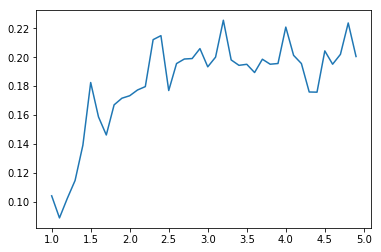

In [229]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def try_one_class_weight(weight, bag_num):
    df_train, df_test = train_test_split(df_num)
    rf = train_with_redux(df_train, weight, bag_num)
    X_test, y_test = separate_X_y(df_test)
    y_pred = rf.predict(X_test, threshold = 0.5)
    cf_mat = confusion_matrix(y_test, y_pred)
    mcc = calc_mcc(cf_mat)
    return mcc


npdata = np.arange(1.0, 5.0, 0.1)
bag_nums = np.arange(12, 32, 4)

for bag_num_idx in range(0, bag_nums.size):
    score = np.zeros(npdata.size)
    print(bag_nums[bag_num_idx])
    for idx in range(0, npdata.size):
        mcc = try_one_class_weight(npdata[idx], bag_nums[bag_num_idx])
        score[idx] = mcc 
        print(mcc)
    plt.plot(npdata, score)
    plt.show()
    